In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
given_data = pd.read_csv('Matrix_Factorization_Assignment.csv')

In [4]:
data_ini = given_data.copy()
print(data_ini.shape)
data_ini.head(10)

(45000, 5001)


,Index,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
5,9280,NaN,5.0,NaN,10.0,NaN,NaN,1.0,NaN,7.0,...,NaN,NaN,8.0,9.0,NaN,NaN,8.0,6.0,NaN,1.0
6,28289,NaN,3.0,2.0,2.0,10.0,NaN,NaN,2.0,9.0,...,NaN,NaN,NaN,6.0,7.0,1.0,NaN,NaN,NaN,0.0
7,3827,0.0,NaN,NaN,NaN,NaN,6.0,5.0,NaN,2.0,...,NaN,1.0,NaN,NaN,0.0,NaN,3.0,9.0,NaN,NaN
8,45072,1.0,0.0,NaN,NaN,5.0,4.0,2.0,NaN,8.0,...,NaN,9.0,3.0,1.0,NaN,0.0,3.0,6.0,9.0,NaN
9,13205,NaN,2.0,7.0,9.0,9.0,6.0,7.0,8.0,NaN,...,NaN,NaN,7.0,NaN,NaN,7.0,7.0,NaN,NaN,7.0


# Deleting Rows

In [5]:
data1 = data_ini.copy()
for key,rows in data1.iterrows():
    if(rows['Index'] % 282 == 0):
        data1.drop(key,axis=0,inplace=True)
data1.shape

(44847, 5001)

# Deleting Columns

In [6]:
data2 = data1.drop(['Index'],axis=1)
data2.head()
for key,cols in data2.iteritems():
    if(int(key) != 0 and int(key) %282 == 0):
        data2.drop(key,axis=1,inplace=True)
data2.shape

(44847, 4983)

# Saving New Data

In [ ]:
data2.to_csv('Updated_Dataset.csv',index=False)

In [7]:
print(data_ini.shape)
data2.shape

(45000, 5001)


(44847, 4983)

# Reading New Saved Data

In [5]:
data = pd.read_csv('Updated_Dataset.csv')
print(data.shape)
data.head(100)

(44847, 4983)


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0,NaN,10.0,3.0,9.0,9.0,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,8.0,NaN,9.0,4.0,NaN,NaN,NaN
96,NaN,NaN,NaN,8.0,8.0,4.0,NaN,NaN,NaN,10.0,...,4.0,4.0,2.0,0.0,3.0,8.0,NaN,9.0,1.0,2.0
97,3.0,6.0,NaN,9.0,NaN,4.0,3.0,4.0,NaN,NaN,...,NaN,3.0,NaN,4.0,NaN,1.0,7.0,3.0,2.0,10.0
98,NaN,7.0,1.0,8.0,3.0,3.0,8.0,4.0,NaN,NaN,...,4.0,8.0,NaN,10.0,8.0,NaN,NaN,2.0,NaN,NaN


In [6]:
con_data = np.array(data.replace(np.nan,0.0),dtype=np.float16)
print(con_data)

N,M = con_data.shape
print(N,M)

[[ 1.  7.  1. ...  0.  0.  0.]
 [ 0.  3.  3. ...  0.  9.  2.]
 [ 5.  7.  0. ...  0.  0.  7.]
 ...
 [ 0.  9.  0. ...  0.  1.  4.]
 [10.  0.  7. ...  0.  8.  8.]
 [ 0.  7.  0. ...  0.  2.  0.]]
44847 4983


# Functions

In [4]:
def calculate_U(V,lamda_U,K,data):
    U = (data.dot(V)).dot(np.linalg.inv((V.T).dot(V) + (lamda_U*np.eye(K))))
    return U  

def calculate_V(U,lamda_V,K,data):
    V = ((data.T).dot(U)).dot(np.linalg.inv((U.T).dot(U) + (lamda_V*np.eye(K))))
    return V  

def MSE(act_val,pred_val):
    lst = np.nonzero(act_val)
    return mean_squared_error(act_val[lst],pred_val[lst])

def plot_graph(Loss,K):
    plt.plot(Loss,label = 'K = '+str(K))
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.savefig(('Graph for '+str(K))+'.png')
    plt.show()

# Generating Loss Curves

K= 10
i=  0 loss=  14.247360325412266
i=  20 loss=  14.229241050909105
i=  40 loss=  14.22843143052494
i=  60 loss=  14.22819508092307
i=  80 loss=  14.228080538860857
i=  100 loss=  14.228009429811436
i=  120 loss=  14.227960767919324
i=  140 loss=  14.227926163653109
i=  160 loss=  14.227900913503996
i=  180 loss=  14.22788196892791


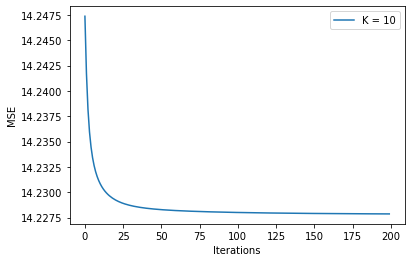

K= 100
i=  0 loss=  13.917072760862151
i=  20 loss=  13.730354215340055
i=  40 loss=  13.723755136206078
i=  60 loss=  13.722093772986577
i=  80 loss=  13.721452022901136
i=  100 loss=  13.721146206194993
i=  120 loss=  13.720979078539953
i=  140 loss=  13.720877860631854
i=  160 loss=  13.720812013746691
i=  180 loss=  13.720767227034385


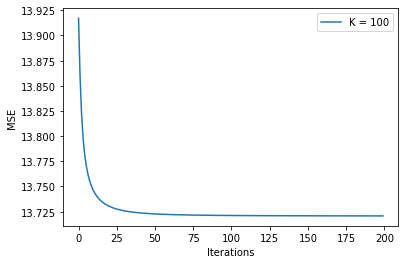

K= 200
i=  0 loss=  13.553132257807892
i=  20 loss=  13.196504412912187
i=  40 loss=  13.186773391605652
i=  60 loss=  13.184669681917315
i=  80 loss=  13.183942621782174
i=  100 loss=  13.183619125909
i=  120 loss=  13.183450864666865
i=  140 loss=  13.183352493013238
i=  160 loss=  13.183289158485183
i=  180 loss=  13.183245059298324


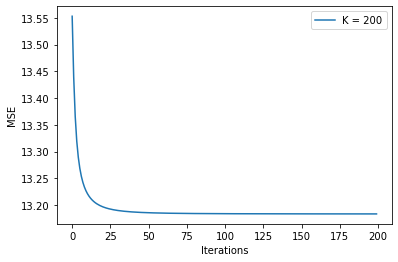

K= 300
i=  0 loss=  13.193224982112142
i=  20 loss=  12.68272729271316
i=  40 loss=  12.671291908665674
i=  60 loss=  12.668918702402198
i=  80 loss=  12.66809666659587
i=  100 loss=  12.667724566732447
i=  120 loss=  12.667523237269961
i=  140 loss=  12.667399832987572
i=  160 loss=  12.667318027221885
i=  180 loss=  12.667261397522264


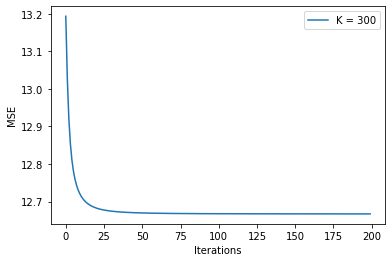

K= 400
i=  0 loss=  12.838971784005306
i=  20 loss=  12.186437730930981
i=  40 loss=  12.174228869172897
i=  60 loss=  12.171826979995178
i=  80 loss=  12.170983164105557
i=  100 loss=  12.170589812378548
i=  120 loss=  12.170371269675458
i=  140 loss=  12.170235121313649
i=  160 loss=  12.170143618710275
i=  180 loss=  12.170078813776977


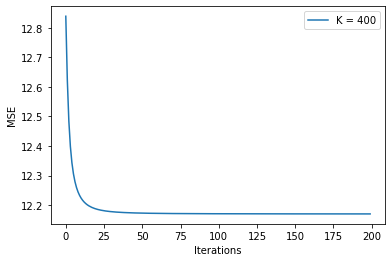

K= 500
i=  0 loss=  12.48543709382711
i=  20 loss=  11.706987553186565
i=  40 loss=  11.694218578950078
i=  60 loss=  11.69172843245956
i=  80 loss=  11.690834187225844
i=  100 loss=  11.690412303146616
i=  120 loss=  11.69018246052199
i=  140 loss=  11.690047306989037
i=  160 loss=  11.689963886698408
i=  180 loss=  11.689909915030897


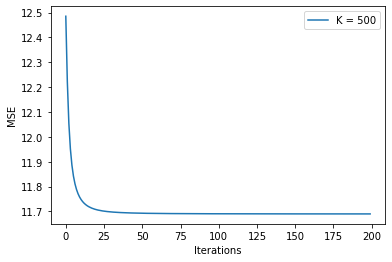

K= 600
i=  0 loss=  12.136300153459938
i=  20 loss=  11.243023936489337
i=  40 loss=  11.229941148512435
i=  60 loss=  11.227463134707083
i=  80 loss=  11.226593608678723
i=  100 loss=  11.226187874091199
i=  120 loss=  11.225969358296096
i=  140 loss=  11.225841766191293
i=  160 loss=  11.225762445453158
i=  180 loss=  11.225709867944975


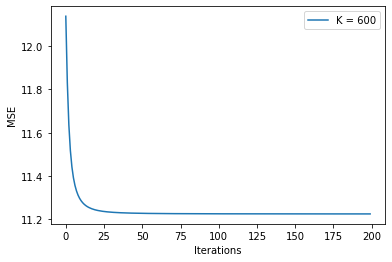

K= 700
i=  0 loss=  11.792179386252997
i=  20 loss=  10.793950359106514
i=  40 loss=  10.780829521634129
i=  60 loss=  10.778299262278876
i=  80 loss=  10.777388894496573
i=  100 loss=  10.776957853326495
i=  120 loss=  10.776720866839655
i=  140 loss=  10.776576790370934
i=  160 loss=  10.776481905993485
i=  180 loss=  10.776415199676638


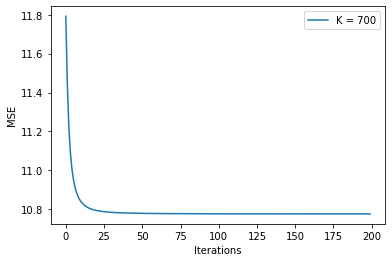

K= 800
i=  0 loss=  11.449026257351301
i=  20 loss=  10.358693245540003
i=  40 loss=  10.345583565646232
i=  60 loss=  10.343044210512788
i=  80 loss=  10.342121603745813
i=  100 loss=  10.341679795052396
i=  120 loss=  10.341433810787208
i=  140 loss=  10.341281610570933
i=  160 loss=  10.341179797329298
i=  180 loss=  10.341107628246906


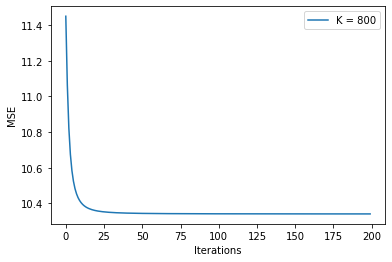

K= 900
i=  0 loss=  11.11160089711248
i=  20 loss=  9.936484122730233
i=  40 loss=  9.923354294626836
i=  60 loss=  9.920825920535556
i=  80 loss=  9.919928158120467
i=  100 loss=  9.919508897261043
i=  120 loss=  9.919277736893573
i=  140 loss=  9.919134669479522
i=  160 loss=  9.919039036239969
i=  180 loss=  9.91897193078488


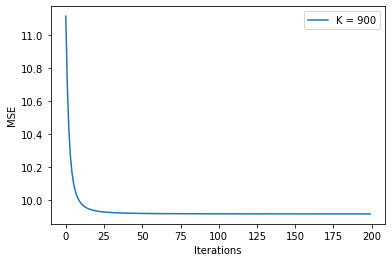

In [35]:
np.random.seed(21)
# graphs_for_K = []
for K in [10,100,200,300,400,500,600,700,800,900]:
    print('K=',K)
    V = np.random.random((M,K))
    V /= sum(sum(V))            # Normalizing V
#    print(V)
    lamda_V = (0.00025 - 0.0001 * (282 % 7))
    lamda_U = (0.00015 + 0.0001 * (282 % 8))
    
    Loss_graph = []
    for i in range(200):
        U = calculate_U(V,lamda_U,K,con_data)
        V = calculate_V(U,lamda_V,K,con_data)
        loss = MSE(con_data,(U.dot(V.T)))
        Loss_graph.append(loss)
        if i%20 ==0:
            print("i= ",i,"loss= ",loss)
    U_data = pd.DataFrame(U)
    U_data.to_csv('U_Matrix'+str(K)+'.csv', index=False)
    
    V_data = pd.DataFrame(V)
    V_data.to_csv('V_Matrix'+str(K)+'.csv', index=False)
    
    plot_graph(Loss_graph,K)
#     graphs_for_K.append(Loss)

# Different Values of K and Iterations

K= 3500
i=  0 loss=  3.467319822189958
i=  5 loss=  2.401019045089167
i=  10 loss=  2.3267820572336575
i=  15 loss=  2.3107483595147027
i=  20 loss=  2.3048509545929643
i=  25 loss=  2.3020603566026456
i=  30 loss=  2.3005311995782827
i=  35 loss=  2.299607390985763
i=  40 loss=  2.2990084613788344
i=  45 loss=  2.2985986587289955


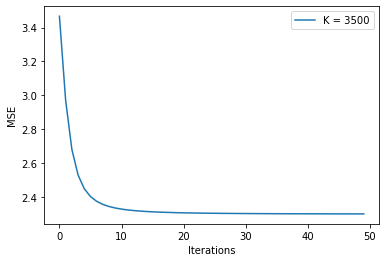

K= 4000
i=  0 loss=  2.230442313145189
i=  5 loss=  1.4588229595673399
i=  10 loss=  1.4048078463516362
i=  15 loss=  1.3929340616709074
i=  20 loss=  1.3885607455395228
i=  25 loss=  1.3864880314691586
i=  30 loss=  1.3853471571279685
i=  35 loss=  1.3846527650171658
i=  40 loss=  1.3841982536833715
i=  45 loss=  1.3838840935845345


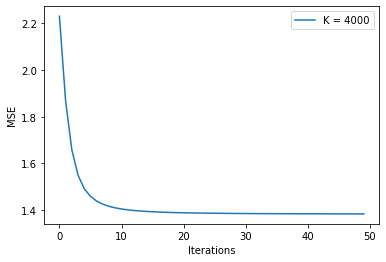

K= 4500
i=  0 loss=  1.0647481435480706
i=  5 loss=  0.6542758251108928
i=  10 loss=  0.623090722020952
i=  15 loss=  0.6156252368716567
i=  20 loss=  0.6128198168954527
i=  25 loss=  0.6114783778159815
i=  30 loss=  0.6107331845357581
i=  35 loss=  0.6102762948608026
i=  40 loss=  0.6099757763437804
i=  45 loss=  0.6097672755637891


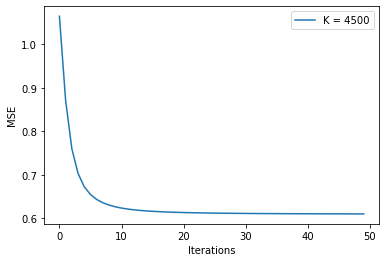

In [6]:
np.random.seed(21)
# graphs_for_K = []
for K in [3500,4000,4500]:
    print('K=',K)
    V = np.random.random((M,K))
    V /= sum(sum(V))            # Normalizing V
#    print(V)
    lamda_V = (0.00025 - 0.0001 * (282 % 7))
    lamda_U = (0.00015 + 0.0001 * (282 % 8))
    
    Loss_graph = []
    for i in range(50):
        U = calculate_U(V,lamda_U,K,con_data)
        V = calculate_V(U,lamda_V,K,con_data)
        loss = MSE(con_data,(U.dot(V.T)))
        Loss_graph.append(loss)
        if i%5 ==0:
            print("i= ",i,"loss= ",loss)
#     U_data = pd.DataFrame(U)
#     U_data.to_csv('U_Matrix'+str(K)+'.csv', index=False)
    
#     V_data = pd.DataFrame(V)
#     V_data.to_csv('V_Matrix'+str(K)+'.csv', index=False)
    
    plot_graph(Loss_graph,K)
#     graphs_for_K.append(Loss)

# Cosine Similarities

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine Similarity of U

In [3]:
U = pd.read_csv('U_Matrix900.csv')
U.shape
New_U = U.to_numpy()
cos_u = cosine_similarity(New_U)
print(cos_u)

[[1.         0.99986032 0.9998645  ... 0.99986436 0.9998601  0.99986404]
 [0.99986032 1.         0.9998713  ... 0.99987355 0.9998745  0.99986644]
 [0.9998645  0.9998713  1.         ... 0.99986765 0.99986789 0.99986992]
 ...
 [0.99986436 0.99987355 0.99986765 ... 1.         0.9998712  0.99986607]
 [0.9998601  0.9998745  0.99986789 ... 0.9998712  1.         0.99986934]
 [0.99986404 0.99986644 0.99986992 ... 0.99986607 0.99986934 1.        ]]


# Cosine Similarity of V

In [4]:
V = pd.read_csv('V_Matrix900.csv')
V.shape
New_V = V.to_numpy()
cos_v = cosine_similarity(New_V)
print(cos_v)

[[ 1.00000000e+00 -2.33425986e-02  8.86607314e-03 ... -1.66766341e-04
   2.23754641e-02 -2.61544205e-02]
 [-2.33425986e-02  1.00000000e+00  3.19488569e-02 ... -1.65865682e-02
  -2.85825153e-02  2.58531305e-02]
 [ 8.86607314e-03  3.19488569e-02  1.00000000e+00 ...  1.10719104e-02
  -3.75688027e-02 -1.86583090e-02]
 ...
 [-1.66766341e-04 -1.65865682e-02  1.10719104e-02 ...  1.00000000e+00
   4.28697816e-02 -3.06637512e-02]
 [ 2.23754641e-02 -2.85825153e-02 -3.75688027e-02 ...  4.28697816e-02
   1.00000000e+00  1.73009541e-02]
 [-2.61544205e-02  2.58531305e-02 -1.86583090e-02 ... -3.06637512e-02
   1.73009541e-02  1.00000000e+00]]


# Suggesting Movies that User hadn't Reviewed

In [6]:
U = pd.read_csv('U_Matrix900.csv')
U = U.to_numpy()
V = pd.read_csv('V_Matrix900.csv')
V = V.to_numpy()
X = U.dot(V.T)
X = pd.DataFrame(X)

In [45]:
def suggestion(user_id,movie_no):
    movie = data.iloc[4]
    nan = [i for i in range(len(movie)) if pd.isna(movie[i])]
    sugg = {}
    for j in nan:
        rates = X.iloc[user_id][j]
        if(rates>7):
            sugg[j] = rates
    sug_list = sorted(sugg.items(),key=lambda x: x[1],reverse=True)
    for k in sug_list[0:movie_no]:
        print(k[0],k[1])

In [46]:
suggestion(21,5)    # suggestion( Number of user , Number of movies)

2446 8.664001239513102
3375 8.60208877328462
232 8.318789792280185
4062 8.080855668486308
4253 8.065153453925689
